In [15]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error

def group_mean_log_mae(y_true, y_pred, groups, floor=1e-9):
    maes = (y_true-y_pred).abs().groupby(groups).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

def log_mean_absolute_error(y_true, y_pred):
    return np.log(mean_absolute_error(y_true, y_pred))
%matplotlib inline

In [4]:
schnet = pd.read_csv('../submissions/SchNet_ensemble_v3.csv')
b44 = pd.read_csv('../submissions/BLEND044_sub_-2.03355CV.csv')
test = pd.read_csv('../input/test.csv')
ss = b44.copy()
ss['scc_sch'] = schnet['scalar_coupling_constant']
ss['scc_b44'] = b44['scalar_coupling_constant']
ss['type'] = test['type']

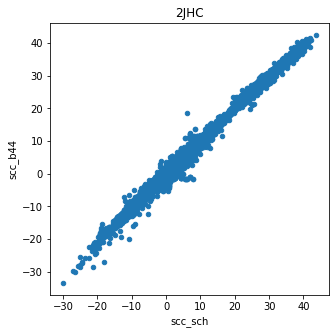

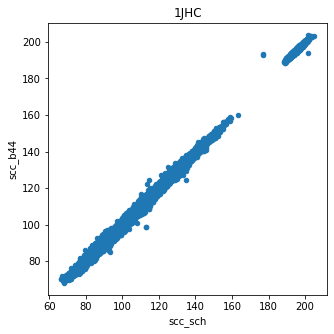

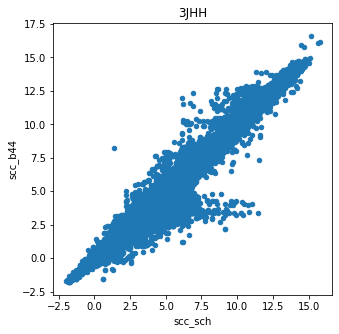

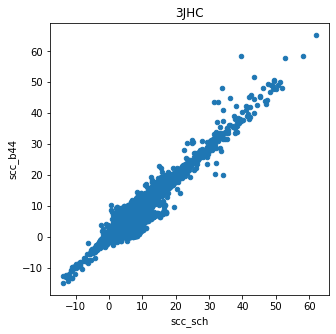

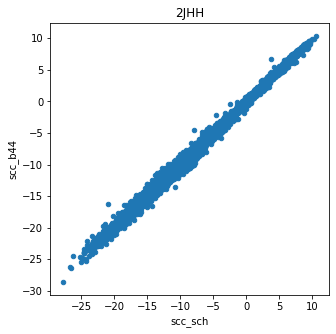

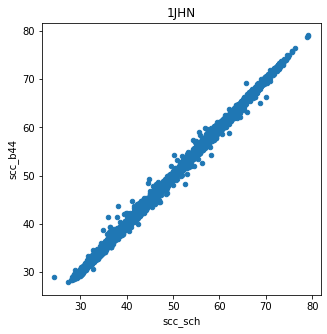

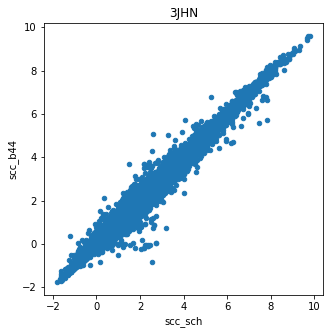

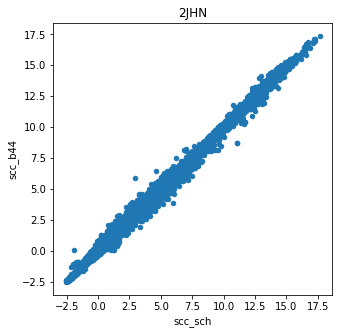

In [8]:
for t in ss['type'].unique():
    ss.loc[ss['type'] == t]\
        .plot(x='scc_sch',
              y='scc_b44',
              kind='scatter',
              figsize=(5, 5),
              title=t)
    plt.show()

In [10]:
ss['scalar_coupling_constant'] = (ss['scc_sch'] * 2 + ss['scc_b44']) / 3

In [16]:
print('MAE vs Good Sub')
for i, d in ss.groupby('type'):
    mae_t = mean_absolute_error(d['scc_sch'], d['scc_b44'])
    corr_t = np.corrcoef(d['scc_sch'], d['scc_b44'])[1][0]
    print(f'{i} - {mae_t:0.5f} - {corr_t:0.5f}')

MAE vs Good Sub
1JHC - 0.32163 - 0.99963
1JHN - 0.19921 - 0.99958
2JHC - 0.12733 - 0.99872
2JHH - 0.07596 - 0.99941
2JHN - 0.07400 - 0.99939
3JHC - 0.19068 - 0.99016
3JHH - 0.10572 - 0.99797
3JHN - 0.06473 - 0.99587


In [17]:
ss[['id','scalar_coupling_constant']] \
    .to_csv('../submissions/BLEND050_2parts_Schnet_1part_Tabularblen44.csv',
            index=False)